In [1]:
import matplotlib.pyplot as plt
import numpy as np
import copy

In [2]:
class Line1:
    x: np.ndarray
    y: np.ndarray
    a: int
        
    def __init__(self, x , a, start_x = 0, start_y = 0):
        self.update( x, a, start_x, start_y)
        
    def update_x(self, x):
        self.x = x + self.start_x
        self.y = (x * self.a) + self.start_y
    
    def update(self, x, a, start_x = 0, start_y = 0):
#         self.ax = ax
        self.x = x + start_x
        self.y = (x * a) + start_y
        self.start_x = start_x
        self.start_y = start_y
        self.a = a
        
#     def draw(self):
#       #  plt.xticks([])
#       #  plt.yticks([])
#         self.ax.plot(self.x, self.y, c='b')

In [3]:
class Line2:
    x: np.ndarray
    y: np.ndarray 
        
    def __init__(self, x , start_x = 0, start_y = 0):
        self.update(x , start_x, start_y)
        
    
    def update(self, x , start_x = 0, start_y = 0):
        self.x = x + start_x
        self.y = np.sin(x)*2 + start_y
#         self.ax = ax
        
#     def draw(self):
#       #  plt.xticks([])
#       #  plt.yticks([])
#         self.ax.plot(self.x, self.y, c='g')

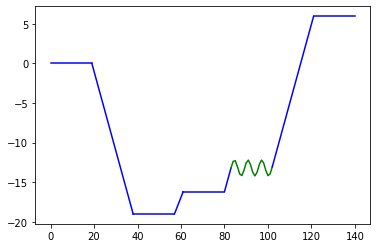

In [17]:
last_x = 0
last_y = 0

for i in range(9):
    if i==0:
         line = Line1(x=np.arange(0,20,1), a=0, start_x=last_x, start_y=last_y)
            
    elif i==1:
         line = Line1(x=np.arange(0,20,1), a=-1, start_x=last_x, start_y=last_y)
            
    elif i==2:
         line = Line1(x=np.arange(0,20,1), a=0, start_x=last_x, start_y=last_y)
            
    elif i==3:
         line = Line1(x=np.arange(0,5,1), a=0.7, start_x=last_x, start_y=last_y)
        
    elif i==4:
         line = Line1(x=np.arange(0,20,1), a=0, start_x=last_x, start_y=last_y)
    
    elif i==5:
         line = Line1(x=np.arange(0,3.5,1), a=1, start_x=last_x, start_y=last_y)  
            
    elif i==6:
         line = Line2(x=np.arange(0,20,1), start_x=last_x, start_y=last_y)  
    
    elif i==7:
         line = Line1(x=np.arange(0,20,1), a=1, start_x=last_x, start_y=last_y)
    
    else:
         line = Line1(x=np.arange(0,20,1), a=0, start_x=last_x, start_y=last_y)
    last_x = line.x[-1]
    last_y = line.y[-1]
    line.draw()

In [13]:
class PlotSeries:
    ax = None
    
    def __init__(self, ax):
        self.plots = []
        self.last_x = 0
        self.last_y = 0
        
        self.x_min = None
        self.x_max = None
#         self.fig = fig
        self.ax = ax
        self.lines = []
        
    def append(self, plot):
        self.plots.append(plot)
        
    def show(self):
        self.x_min = 0
        self.last_x = 0
        self.last_y = 0
        for plot in self.plots:
            
            copy_plot = copy.deepcopy(plot)
            if hasattr(copy_plot, 'a'):
                copy_plot.update(copy_plot.x, copy_plot.a, self.last_x, self.last_y)
            else:
                copy_plot.update(copy_plot.x, self.last_x, self.last_y)
#             print(copy_plot.x, copy_plot.y)
            self.last_x = copy_plot.x[-1]
            self.last_y = copy_plot.y[-1]
            if isinstance(copy_plot, Line1):
                self.lines.append(self.ax.plot(copy_plot.x, copy_plot.y, c='b'))
            else:
                self.lines.append(self.ax.plot(copy_plot.x, copy_plot.y, c='g'))
        self.x_max = self.last_x
        return self.lines

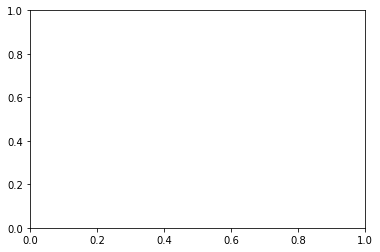

In [14]:
%matplotlib inline


fig, ax = plt.subplots(1,1)
plot_series = PlotSeries( ax)
last_x = 0
last_y = 0

for i in range(1):
    if i==0:
         line = Line1(x=np.arange(0,20,1), a=0)
            
    elif i==1:
         line = Line1(x=np.arange(0,20,1), a=-1)
            
    elif i==2:
         line = Line1(x=np.arange(0,20,1), a=0)
            
    elif i==3:
         line = Line1(x=np.arange(0,5,1), a=0.7)
        
    elif i==4:
         line = Line1(x=np.arange(0,20,1), a=0)
    
    elif i==5:
         line = Line1(x=np.arange(0,3.5,1), a=1)  
            
    elif i==6:
         line = Line2(x=np.arange(0,20,1)) 
    
    elif i==7:
         line = Line1(x=np.arange(0,20,1), a = 1)
    
    else:
         line = Line1(x=np.arange(0,20,1), a = 0)
    last_x = line.x[-1]
    last_y = line.y[-1]
    plot_series.append(line)

In [20]:
plot_series.show()
plt.show()

<Figure size 432x288 with 0 Axes>

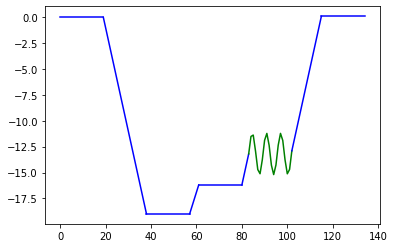

In [12]:
plot_series.plots[7].update_x(np.arange(0,14,1))
plot_series.show()

In [32]:
class HLine:
    
    def __init__(self, ax ,y: float, x_min:float, x_max:float, text: str):
        self.y = y
        self.x_min = x_min
        self.x_max = x_max
        self.label = text
        self.ax = ax
        
    def draw(self):
        ax.hlines(y=self.y, xmin=self.x_min, xmax=self.x_max, linewidth=1, color='r', linestyle = 'dashed')
        labels = [item.get_text() for item in ax.get_yticklabels()]
        labels[1] = self.label
        ax.set_yticklabels(labels)
        print([item.get_text() for item in ax.get_yticklabels()])
        
        